In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('processed.csv')

# Select features for predicting box office success
features = ['budget', 'cast_popularity_mean', 'cast_popularity_max', 
            'director_popularity', 'imdb_rating', 'imdb_votes']

# Target variable
target = 'revenue_worldwide'

# Drop rows with missing values in our selected columns
df_model = df[features + [target]].dropna()

print(f"Dataset shape: {df_model.shape}")
print(f"\nFeatures used:")
for f in features:
    print(f"  - {f}")
print(f"\nTarget: {target}")
print(f"\nBasic statistics of target variable:")
print(df_model[target].describe())

Dataset shape: (795, 7)

Features used:
  - budget
  - cast_popularity_mean
  - cast_popularity_max
  - director_popularity
  - imdb_rating
  - imdb_votes

Target: revenue_worldwide

Basic statistics of target variable:
count    7.950000e+02
mean     1.733321e+08
std      2.680126e+08
min      0.000000e+00
25%      2.078365e+05
50%      6.078098e+07
75%      2.108230e+08
max      2.068224e+09
Name: revenue_worldwide, dtype: float64


In [ ]:
# Prepare features and target
X = df_model[features]
y = df_model[target]

scaler = StandardScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 636
Test set size: 159


In [5]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=" * 50)
print("LINEAR REGRESSION MODEL RESULTS")
print("=" * 50)
print(f"\nModel Performance Metrics:")
print(f"  R² Score:            {r2:.4f}")
print(f"  RMSE:                ${rmse:,.2f}")
print(f"  MAE:                 ${mae:,.2f}")

LINEAR REGRESSION MODEL RESULTS

Model Performance Metrics:
  R² Score:            0.7673
  RMSE:                $122,554,368.36
  MAE:                 $70,808,901.43


In [6]:
# Feature importance (coefficients)
print("\nFeature Coefficients (Impact on Revenue):")
print("-" * 45)
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for _, row in coef_df.iterrows():
    print(f"  {row['Feature']:25} {row['Coefficient']:>15,.2f}")

print(f"\n  {'Intercept':25} {lr_model.intercept_:>15,.2f}")


Feature Coefficients (Impact on Revenue):
---------------------------------------------
  budget                     171,501,852.91
  imdb_rating                -53,043,189.81
  cast_popularity_mean        18,076,213.27
  cast_popularity_max         -5,282,523.39
  director_popularity         -4,282,172.12
  imdb_votes                         309.76

  Intercept                  179,053,548.04


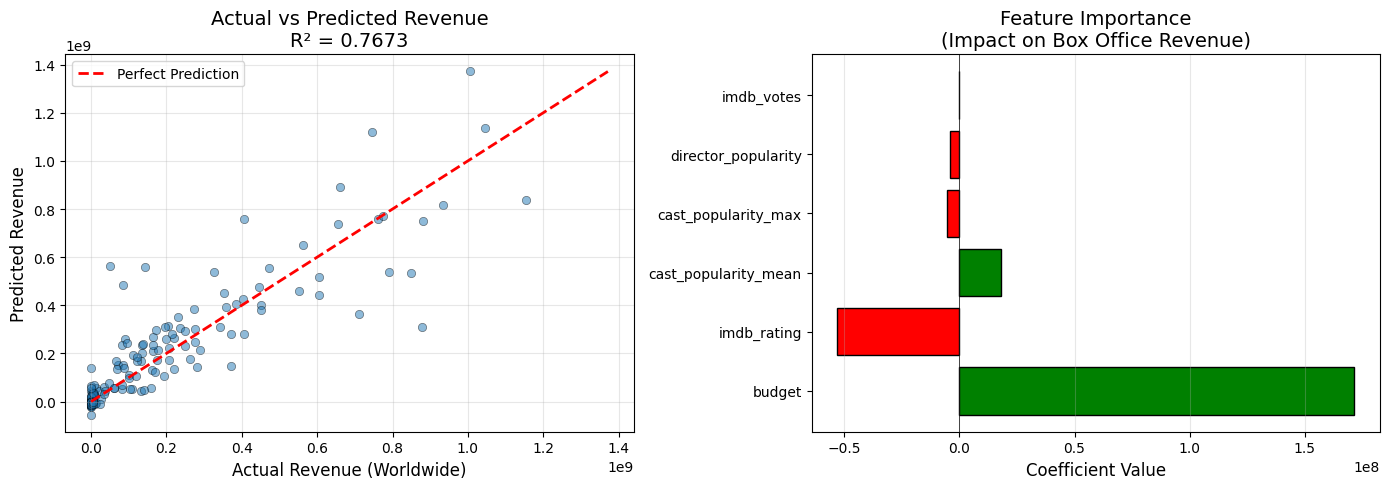

In [7]:
# Visualization: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted scatter plot
axes[0].scatter(y_test, y_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
max_val = max(y_test.max(), y_pred.max())
axes[0].plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Revenue (Worldwide)', fontsize=12)
axes[0].set_ylabel('Predicted Revenue', fontsize=12)
axes[0].set_title(f'Actual vs Predicted Revenue\nR² = {r2:.4f}', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Feature Coefficients bar chart
colors = ['green' if c > 0 else 'red' for c in coef_df['Coefficient']]
axes[1].barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')
axes[1].set_xlabel('Coefficient Value', fontsize=12)
axes[1].set_title('Feature Importance\n(Impact on Box Office Revenue)', fontsize=14)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()